# Rainfall Weather Forecasting

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataset.

rfds = pd.read_csv('RainfallForecast.csv')
rfds

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


as per above we can see there are 8425 rows and 23 columns in the dataset.

# Performing EDA

In [3]:
rfds.shape

(8425, 23)

In [4]:
rfds.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
rfds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [6]:
rfds.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

as per above we can see there are 2 type of dataset (float and object.)

As per above we can also see that Date column has object datatype and we need to change the datatype of this column.

In [7]:
rfds.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [8]:
# Changing datatype of data column from object to datatime

rfds['Date'] = pd.to_datetime(rfds.Date , format = '%Y-%m-%d')
rfds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8425 non-null   datetime64[ns]
 1   Location       8425 non-null   object        
 2   MinTemp        8350 non-null   float64       
 3   MaxTemp        8365 non-null   float64       
 4   Rainfall       8185 non-null   float64       
 5   Evaporation    4913 non-null   float64       
 6   Sunshine       4431 non-null   float64       
 7   WindGustDir    7434 non-null   object        
 8   WindGustSpeed  7434 non-null   float64       
 9   WindDir9am     7596 non-null   object        
 10  WindDir3pm     8117 non-null   object        
 11  WindSpeed9am   8349 non-null   float64       
 12  WindSpeed3pm   8318 non-null   float64       
 13  Humidity9am    8366 non-null   float64       
 14  Humidity3pm    8323 non-null   float64       
 15  Pressure9am    7116 n

now we can see that datatype is changed for date column.

In [9]:
# setting Date column as index column

rfds.set_index('Date' , inplace=True)

In [10]:
# Checking Null values

rfds.isnull().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<AxesSubplot:ylabel='Date'>

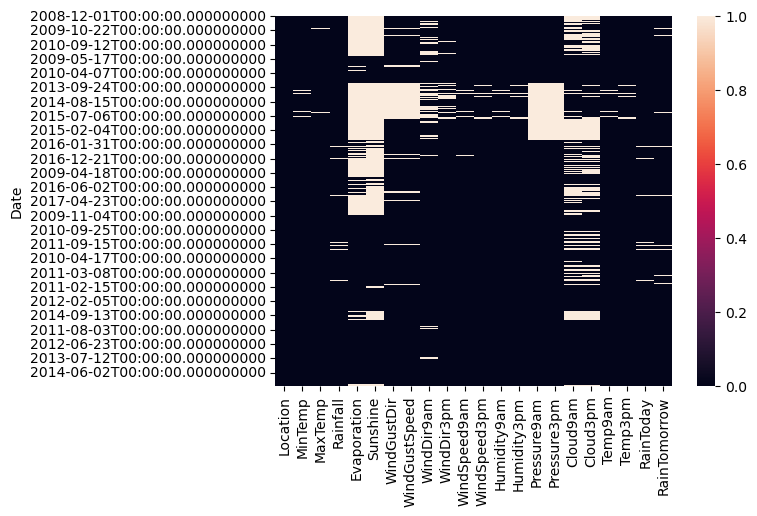

In [11]:
# heatmap for null values

sns.heatmap(rfds.isnull())

as per above we can see that there is null value present in the dataset.

# Seperating Numerical and Categorical columns

In [12]:
# Categorical colums

categorical =[]
for i in rfds.dtypes.index:
    if rfds.dtypes[i] == 'object':
        categorical.append(i)
    print('Categorical columns:',categorical)

Categorical columns: ['Location']
Categorical columns: ['Location']
Categorical columns: ['Location']
Categorical columns: ['Location']
Categorical columns: ['Location']
Categorical columns: ['Location']
Categorical columns: ['Location', 'WindGustDir']
Categorical columns: ['Location', 'WindGustDir']
Categorical columns: ['Location', 'WindGustDir', 'WindDir9am']
Categorical columns: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
Categorical columns: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
Categorical columns: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
Categorical columns: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
Categorical columns: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
Categorical columns: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
Categorical columns: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
Categorical columns: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
Categorical columns

In [13]:
# Numerical columns

numerical =[]
for i in rfds.dtypes.index:
    if rfds.dtypes[i] != 'object':
        numerical.append(i)
    print('Numerical columns:',numerical)

Numerical columns: []
Numerical columns: ['MinTemp']
Numerical columns: ['MinTemp', 'MaxTemp']
Numerical columns: ['MinTemp', 'MaxTemp', 'Rainfall']
Numerical columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation']
Numerical columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine']
Numerical columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine']
Numerical columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed']
Numerical columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed']
Numerical columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed']
Numerical columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am']
Numerical columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']
Numerical columns: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', '

# Removing Null values

In [14]:
# removing null values from numerical columns

column1 =['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 
          'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 
          'Temp3pm']

rfds[column1] = rfds[column1].fillna(rfds[column1].mean())

In [15]:
# removing null values from Categorical columns

column2 =['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

rfds[column2] = rfds[column2].fillna(rfds[column2].median())

# Converting Categorical data into numerical data.

Here we will use label encoder to convert the dataset.

In [16]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

In [18]:
columns =['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 
          'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
          'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

rfds[columns] = rfds[columns].apply(le.fit_transform)
rfds

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,1,150,134,5,28,77,13,21,13,14,...,61,16,90,103,9,5,145,134,0,0
2008-12-02,1,89,157,0,28,77,14,21,6,15,...,33,19,119,110,5,5,148,160,0,0
2008-12-03,1,144,163,0,28,77,15,22,13,15,...,27,24,89,119,5,2,187,149,0,0
2008-12-04,1,107,186,0,28,77,4,9,9,0,...,34,10,189,160,5,5,158,182,0,0
2008-12-05,1,191,229,8,28,77,13,19,1,7,...,72,27,121,92,8,9,155,214,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,9,43,139,0,28,77,0,13,9,1,...,40,18,260,236,5,5,77,140,0,0
2017-06-22,9,51,159,0,28,77,6,8,9,3,...,45,15,249,224,5,5,85,162,0,0
2017-06-23,9,69,175,0,28,77,3,16,9,14,...,42,18,224,201,5,5,101,178,0,0


In [19]:
# checking null value again

rfds.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

now we see that there is no null value in the dataset .

In [20]:
# checking the values counts of each column

for i in rfds.columns:
    print(rfds[i].value_counts()) # this is checking the frequency 
    print('\n')

5     1622
10    1230
8     1204
1      907
6      822
3      611
2      579
7      482
11     474
4      250
0      205
9       39
Name: Location, dtype: int64


147    75
135    74
148    71
154    69
142    68
       ..
6       1
29      1
3       1
1       1
274     1
Name: MinTemp, Length: 286, dtype: int64


95     87
143    75
103    74
156    71
128    68
       ..
0       1
10      1
300     1
4       1
327     1
Name: MaxTemp, Length: 332, dtype: int64


0      5299
2       406
23      240
3       177
5       116
       ... 
222       1
243       1
236       1
175       1
192       1
Name: Rainfall, Length: 251, dtype: int64


28    3512
21     180
16     163
13     147
12     146
      ... 
85       1
72       1
77       1
80       1
4        1
Name: Evaporation, Length: 117, dtype: int64


77     3994
0       166
112      68
113      67
111      66
       ... 
25        8
137       7
139       4
140       3
136       2
Name: Sunshine, Length: 141, dtype: int64


16    991
3

as per above we see that there is no blank or white space present in the dataset.

In [21]:
rfds.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,...,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,5.793591,147.427300,144.003205,15.076439,27.758576,76.944807,8.746944,18.128783,8.546588,8.066350,...,57.339585,45.739703,190.004154,184.997389,5.094481,5.036795,154.094243,140.851988,0.293175,0.293056
std,3.162654,54.147437,61.321221,35.966744,13.953878,28.562429,5.172665,7.803554,5.012591,4.686287,...,17.179909,18.712583,62.558061,61.865200,2.820711,2.687123,56.364402,59.680385,0.514031,0.513752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,108.000000,98.000000,0.000000,21.000000,77.000000,4.000000,13.000000,4.000000,4.000000,...,45.000000,33.000000,153.000000,146.000000,3.000000,3.000000,114.000000,97.000000,0.000000,0.000000
50%,6.000000,148.000000,138.000000,0.000000,28.000000,77.000000,9.000000,18.000000,9.000000,8.000000,...,58.000000,45.000000,190.000000,185.000000,5.000000,5.000000,154.000000,136.000000,0.000000,0.000000
75%,8.000000,189.000000,186.000000,10.000000,28.000000,90.000000,13.000000,23.000000,13.000000,12.000000,...,70.000000,58.000000,227.000000,221.000000,8.000000,8.000000,196.000000,180.000000,1.000000,1.000000
max,11.000000,285.000000,331.000000,250.000000,116.000000,140.000000,16.000000,52.000000,16.000000,16.000000,...,90.000000,94.000000,384.000000,374.000000,9.000000,9.000000,304.000000,328.000000,2.000000,2.000000


It is the statistical presentation of numerical columns.

As per above we can see there is little difference between mean and median.

Also see that there is difference between 75% and max means there is outlier present in the dataset and we need to remove.

Here we can also see get count , std and 25% of the dataset.

In [22]:
# checking number of unique values in each column

rfds.nunique().to_frame('No. of unique values')

,No. of unique values
Location,12
MinTemp,286
MaxTemp,332
Rainfall,251
Evaporation,117
Sunshine,141
WindGustDir,17
WindGustSpeed,53
WindDir9am,17
WindDir3pm,17


here we see there is unique value present in this dataset.

# Data Visualization

1.  Univariate Analysis

5     1622
10    1230
8     1204
1      907
6      822
3      611
2      579
7      482
11     474
4      250
0      205
9       39
Name: Location, dtype: int64


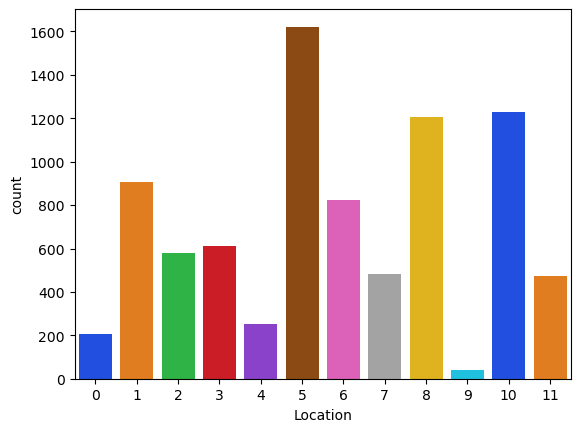

In [23]:
sns.countplot(rfds['Location'],palette='bright')
print(rfds['Location'].value_counts())

In the above plot we see that point 5 has the highest value and point 9 has lowest .

147    75
135    74
148    71
154    69
142    68
       ..
6       1
29      1
3       1
1       1
274     1
Name: MinTemp, Length: 286, dtype: int64


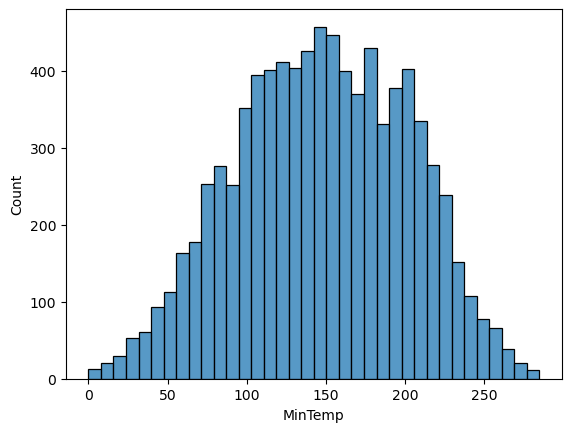

In [24]:
sns.histplot(rfds['MinTemp'], palette='cividis')
print(rfds['MinTemp'].value_counts())

as per above plot we see that 150 has the highest plot..

95     87
143    75
103    74
156    71
128    68
       ..
0       1
10      1
300     1
4       1
327     1
Name: MaxTemp, Length: 332, dtype: int64


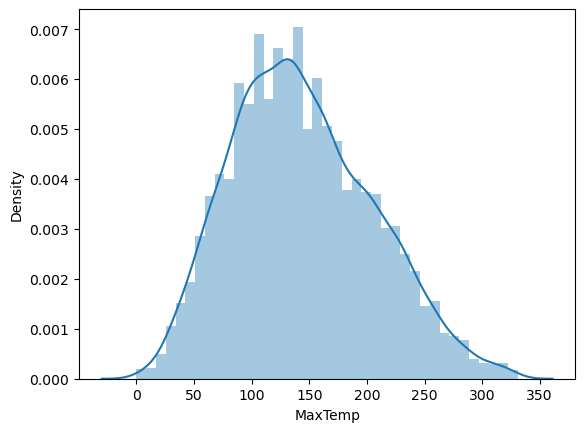

In [25]:
sns.distplot(rfds['MaxTemp'])
print(rfds['MaxTemp'].value_counts())

in this plot we see that 150 has the max values.

0      5299
2       406
23      240
3       177
5       116
       ... 
222       1
243       1
236       1
175       1
192       1
Name: Rainfall, Length: 251, dtype: int64


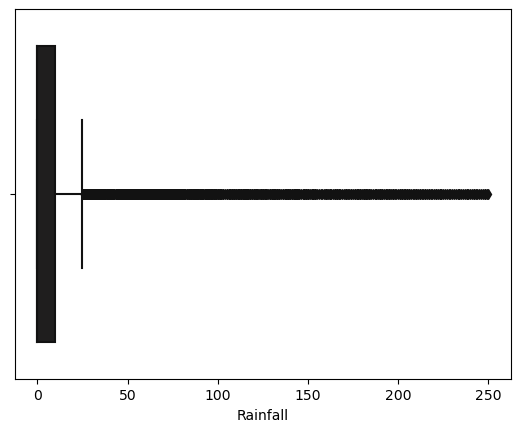

In [26]:
sns.boxplot(rfds['Rainfall'] , palette='icefire')
print(rfds['Rainfall'].value_counts())

as per above plot we see that there is outlier present in this .

28    3512
21     180
16     163
13     147
12     146
      ... 
85       1
72       1
77       1
80       1
4        1
Name: Evaporation, Length: 117, dtype: int64


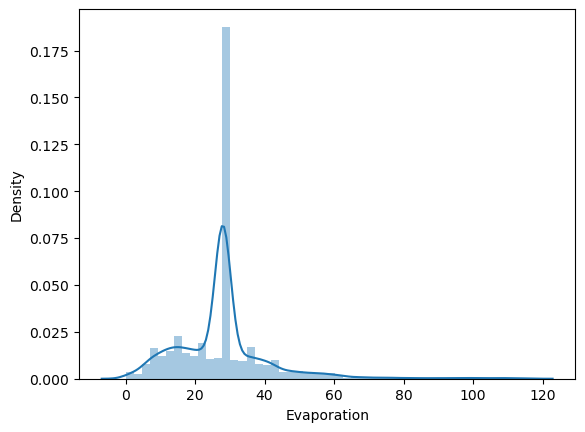

In [27]:
sns.distplot(rfds['Evaporation'])
print(rfds['Evaporation'].value_counts())

In the Evaporation plot we see that it is high in between 20 and 40.

77     3994
0       166
112      68
113      67
111      66
       ... 
25        8
137       7
139       4
140       3
136       2
Name: Sunshine, Length: 141, dtype: int64


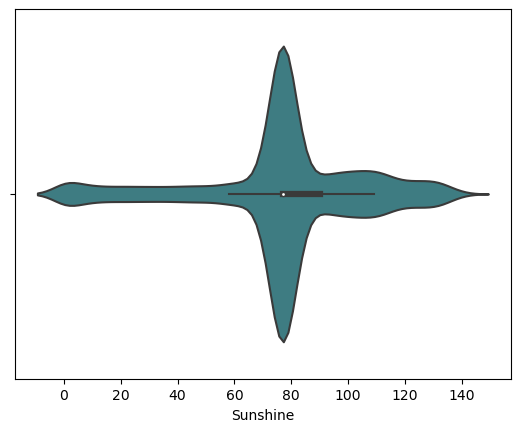

In [28]:
sns.violinplot(rfds['Sunshine'] , palette='crest')
print(rfds['Sunshine'].value_counts())

as per above plot we can see that sunshine is high at 80 point.

16    991
3     713
10    578
8     577
12    572
0     557
14    531
13    507
15    504
9     484
1     415
11    396
7     383
4     353
5     343
2     302
6     219
Name: WindGustDir, dtype: int64


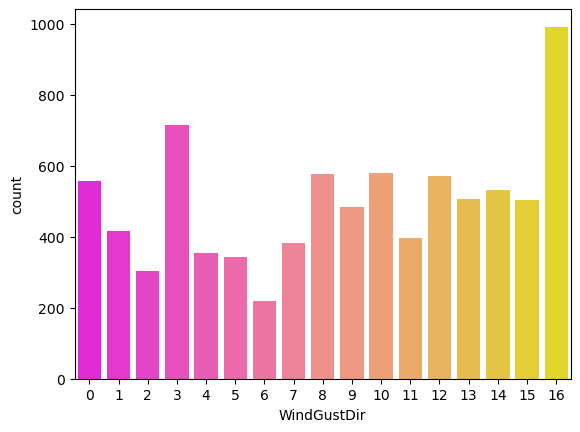

In [29]:
sns.countplot(rfds['WindGustDir'] , palette='spring')
print(rfds['WindGustDir'].value_counts())

In the WindGustDir plot point 16 has the highest value.

18    991
17    441
15    435
16    422
14    408
13    396
19    371
12    367
11    332
20    302
23    292
10    275
24    259
22    258
9     255
25    249
21    241
8     223
26    210
7     186
27    153
28    148
6     137
30    114
29    113
31     95
5      92
32     74
33     64
36     62
4      58
3      57
37     54
35     53
34     49
38     44
39     23
40     22
2      18
43     14
41     13
46     12
45      7
47      7
1       6
42      6
49      4
48      3
44      3
51      2
50      2
0       2
52      1
Name: WindGustSpeed, dtype: int64


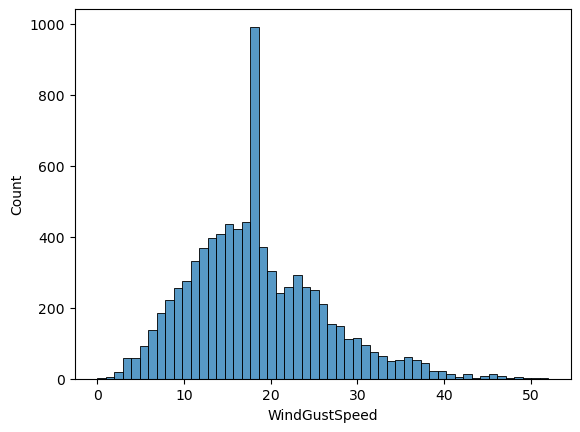

In [30]:
sns.histplot(rfds['WindGustSpeed'] , palette='icefire')
print(rfds['WindGustSpeed'].value_counts())

In the WindGustSpeed point 20 has the highest value .

3     906
16    829
12    704
7     625
15    543
9     505
14    480
11    467
1     433
5     430
13    414
4     409
8     402
0     380
10    365
6     280
2     253
Name: WindDir9am, dtype: int64


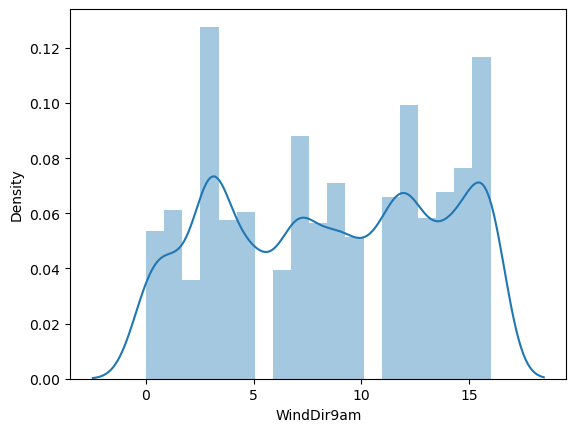

In [32]:
sns.distplot(rfds['WindDir9am'] )
print(rfds['WindDir9am'].value_counts())

In this plot we can see that all the values are equally distributed.

9     813
8     742
10    623
15    580
4     544
3     524
12    494
14    487
7     468
2     462
13    462
0     460
1     417
11    370
5     365
16    308
6     306
Name: WindDir3pm, dtype: int64


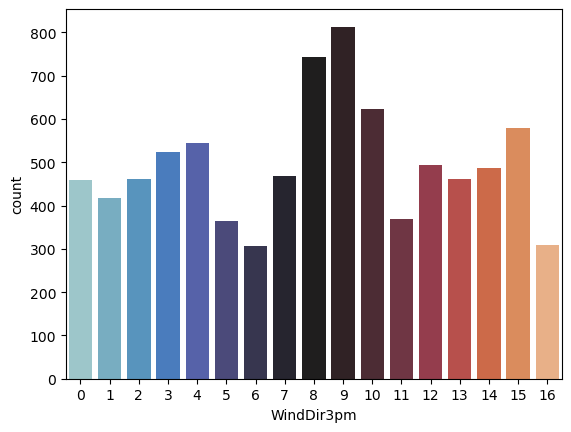

In [33]:
sns.countplot(rfds['WindDir3pm'] , palette='icefire')
print(rfds['WindDir3pm'].value_counts())

In this plot point 9 has the highest value.

5     803
0     752
7     708
2     610
6     607
4     572
3     515
10    481
9     467
11    430
12    427
14    312
13    279
1     258
16    229
15    208
18    153
17    114
20     77
8      76
19     70
21     58
23     49
22     35
25     29
24     28
26     26
29     16
28     10
31      8
30      6
27      6
33      2
32      2
34      2
Name: WindSpeed9am, dtype: int64


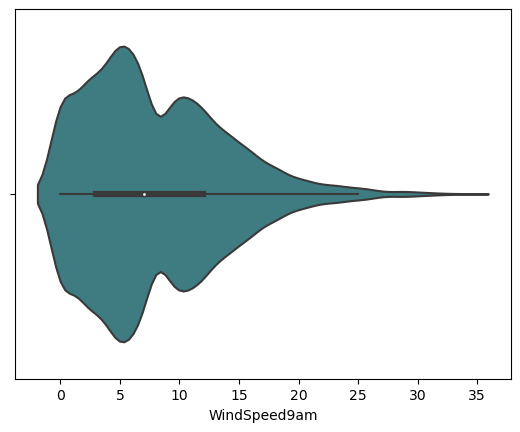

In [34]:
sns.violinplot(rfds['WindSpeed9am'] , palette='crest')
print(rfds['WindSpeed9am'].value_counts())

In the 9am plot maximum value is a point 5.

5     724
11    639
7     599
12    594
9     555
6     534
8     524
14    511
16    458
13    457
15    378
4     331
2     287
17    279
18    266
3     240
0     199
19    170
20    137
21    125
10    107
22     80
1      58
23     45
24     34
26     29
25     18
28     12
27     11
29      9
31      7
30      2
33      2
32      2
34      1
35      1
Name: WindSpeed3pm, dtype: int64


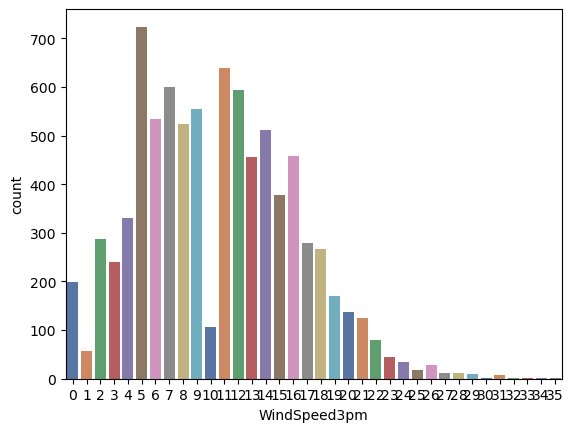

In [35]:
sns.countplot(rfds['WindSpeed3pm'] , palette='deep')
print(rfds['WindSpeed3pm'].value_counts())

63    205
51    202
58    199
64    195
60    188
     ... 
6       2
3       2
1       2
0       1
4       1
Name: Humidity9am, Length: 91, dtype: int64


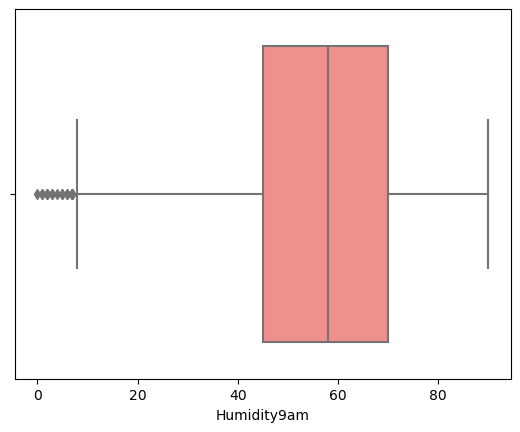

In [36]:
sns.boxplot(rfds['Humidity9am'] , palette='spring')
print(rfds['Humidity9am'].value_counts())

As per above plot we can see that this column has some outlier present.

50    195
45    194
42    194
49    193
40    193
     ... 
2      11
1       9
93      7
94      3
0       3
Name: Humidity3pm, Length: 95, dtype: int64


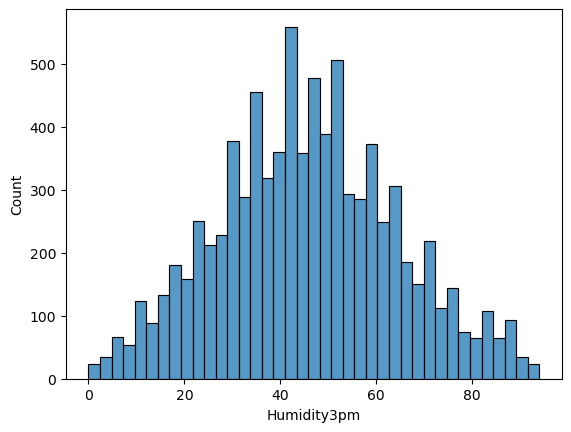

In [37]:
sns.histplot(rfds['Humidity3pm'] , palette='spring')
print(rfds['Humidity3pm'].value_counts())

In the humidity plot we can see that some point has high value and some has low values.

190    1309
161      58
206      55
174      54
210      53
       ... 
380       1
11        1
376       1
371       1
349       1
Name: Pressure9am, Length: 385, dtype: int64


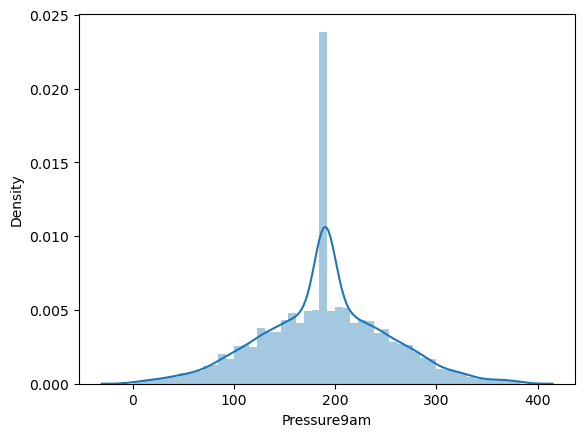

In [39]:
sns.distplot(rfds['Pressure9am'])
print(rfds['Pressure9am'].value_counts())

For the pressure 9am plot point 200 has the highest values.

185    1312
211      60
213      57
212      53
231      53
       ... 
0         1
7         1
25        1
333       1
328       1
Name: Pressure3pm, Length: 375, dtype: int64


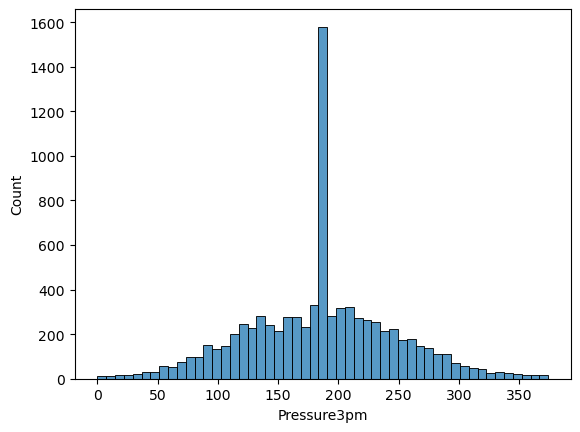

In [41]:
sns.histplot(rfds['Pressure3pm'] , palette='cividis')
print(rfds['Pressure3pm'].value_counts())

In the pressure at 3 pm plot all the points has almost equal value but only 1 point has the highest value.

5    2421
8    1418
1    1038
9    1015
0     554
7     551
6     414
3     384
2     357
4     273
Name: Cloud9am, dtype: int64


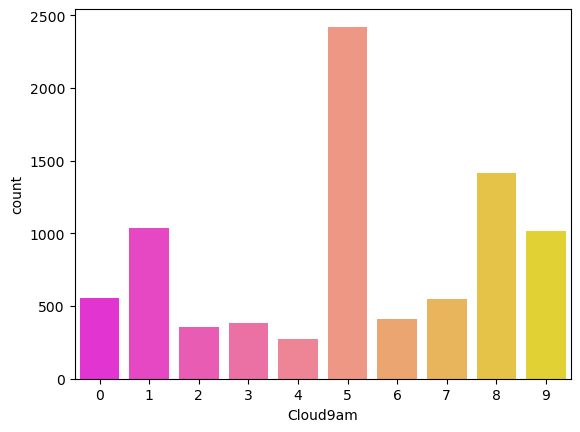

In [42]:
sns.countplot(rfds['Cloud9am'] , palette='spring')
print(rfds['Cloud9am'].value_counts())

In the cloud 9 am plot ppoint 5 has the highest values and point 4 has the lowest value.

5    2455
8    1294
1    1077
9     863
7     597
6     522
2     508
3     411
4     351
0     347
Name: Cloud3pm, dtype: int64


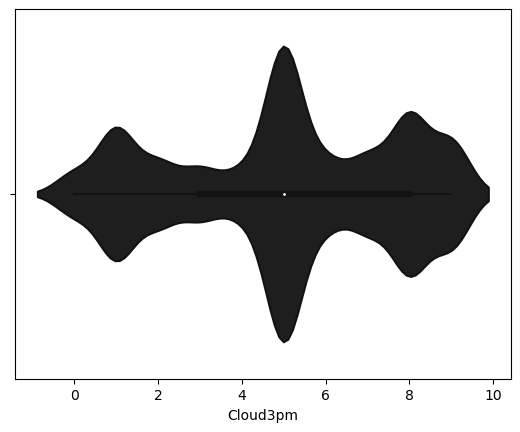

In [43]:
sns.violinplot(rfds['Cloud3pm'] , palette='icefire')
print(rfds['Cloud3pm'].value_counts())

In the cloud3pm plot highest value is in between 4 and 6 .

124    77
157    73
160    71
151    69
183    68
       ..
5       1
1       1
12      1
28      1
279     1
Name: Temp9am, Length: 305, dtype: int64


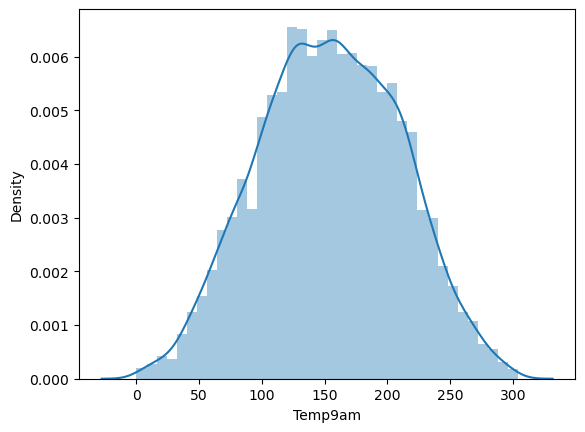

In [26]:
sns.distplot(rfds['Temp9am'])
print(rfds['Temp9am'].value_counts())

in the temp9am plot we can see that bell curve.

141    96
108    78
142    77
106    75
133    72
       ..
4       1
291     1
284     1
3       1
325     1
Name: Temp3pm, Length: 329, dtype: int64


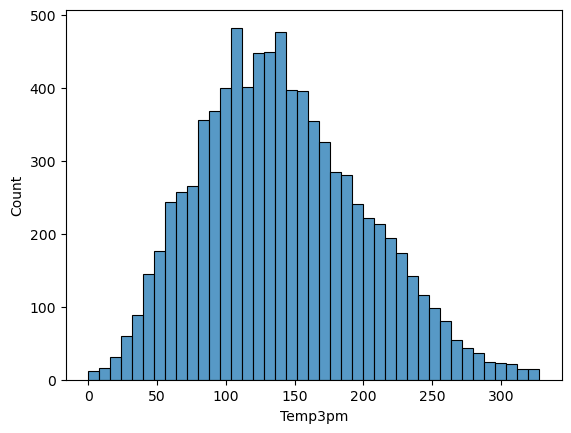

In [27]:
sns.histplot(rfds['Temp3pm'] , palette ='spring')
print(rfds['Temp3pm'].value_counts())

0    6195
1    1990
2     240
Name: RainToday, dtype: int64


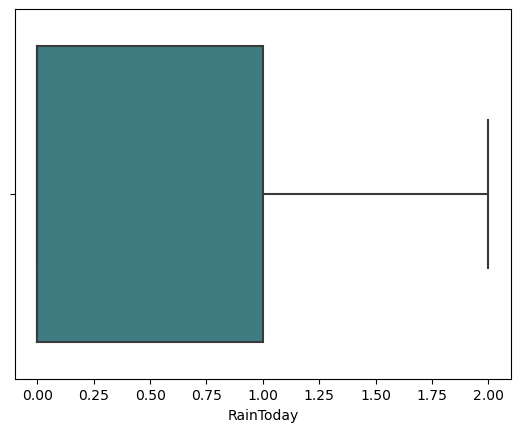

In [28]:
sns.boxplot(rfds['RainToday'] , palette='crest')
print(rfds['RainToday'].value_counts())

0    6195
1    1991
2     239
Name: RainTomorrow, dtype: int64


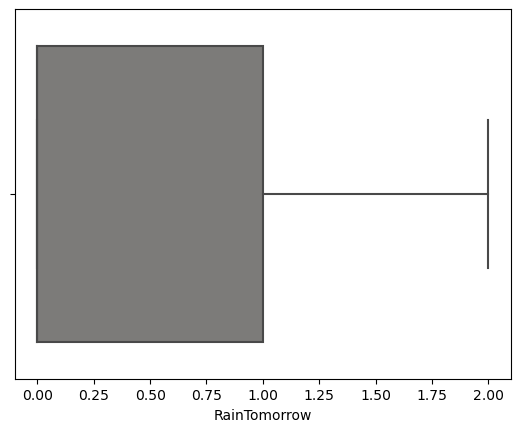

In [29]:
sns.boxplot(rfds['RainTomorrow'], palette='cividis')
print(rfds['RainTomorrow'].value_counts())

2 . Univariate Analysis

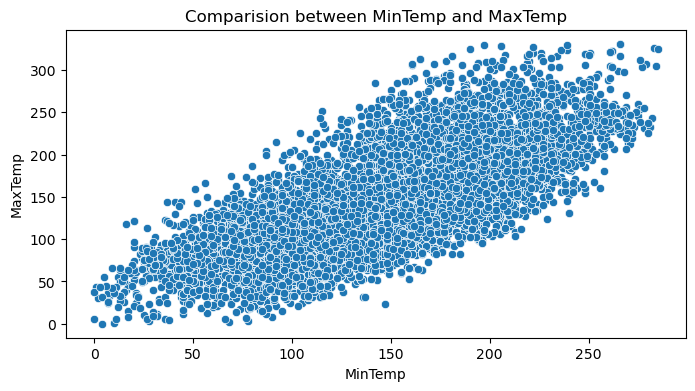

In [31]:
# Comparision between MinTemp and MaxTemp

plt.figure(figsize=(8,4))
plt.title('Comparision between MinTemp and MaxTemp')
sns.scatterplot(x='MinTemp',y='MaxTemp' ,data=rfds ,palette='bright')
plt.show()

In this plot we can see that this two columns is getting linear relation .

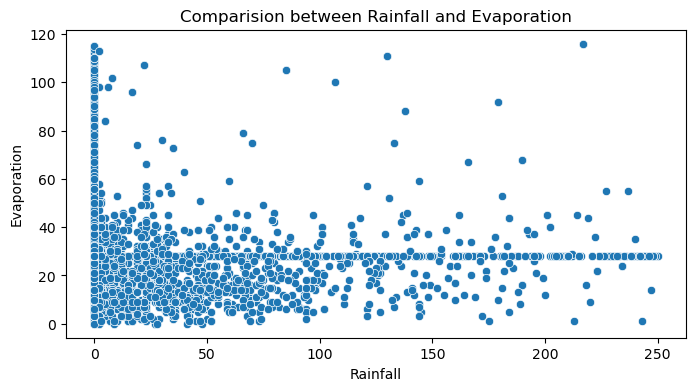

In [33]:
# Comparision between Rainfall and Evaporation

plt.figure(figsize=(8,4))
plt.title('Comparision between Rainfall and Evaporation')
sns.scatterplot(x='Rainfall',y='Evaporation' ,data=rfds ,palette='icefire')
plt.show()

in the rainfall and evaporation we have all the values is scattered.

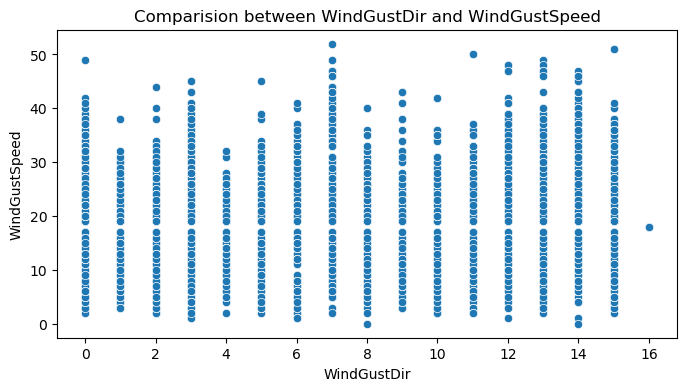

In [34]:
# Comparision between WindGustDir and WindGustSpeed

plt.figure(figsize=(8,4))
plt.title('Comparision between WindGustDir and WindGustSpeed')
sns.scatterplot(x='WindGustDir',y='WindGustSpeed' ,data=rfds ,palette='icefire')
plt.show()

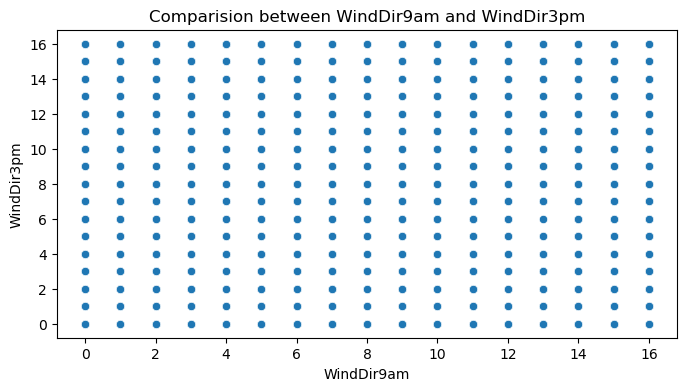

In [36]:
# Comparision between WindDir9am and WindDir3pm

plt.figure(figsize=(8,4))
plt.title('Comparision between WindDir9am and WindDir3pm')
sns.scatterplot(x='WindDir9am',y='WindDir3pm' ,data=rfds ,palette='cividis')
plt.show()

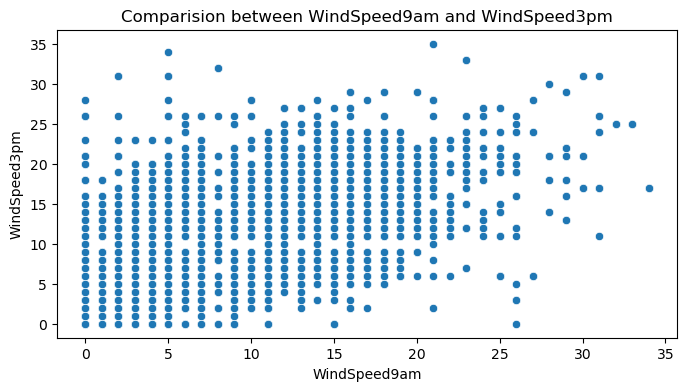

In [37]:
# Comparision between WindSpeed9am and WindSpeed3pm

plt.figure(figsize=(8,4))
plt.title('Comparision between WindSpeed9am and WindSpeed3pm')
sns.scatterplot(x='WindSpeed9am',y='WindSpeed3pm' ,data=rfds ,palette='cividis')
plt.show()

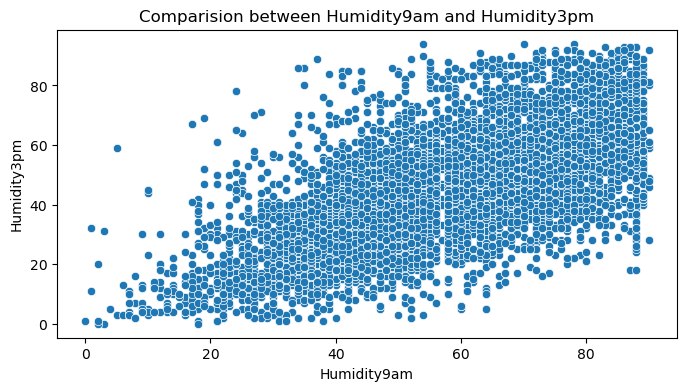

In [41]:
# Comparision between Humidity9am and Humidity3pm

plt.figure(figsize=(8,4))
plt.title('Comparision between Humidity9am and Humidity3pm')
sns.scatterplot(x='Humidity9am',y='Humidity3pm' ,data=rfds ,palette='crest')
plt.show()

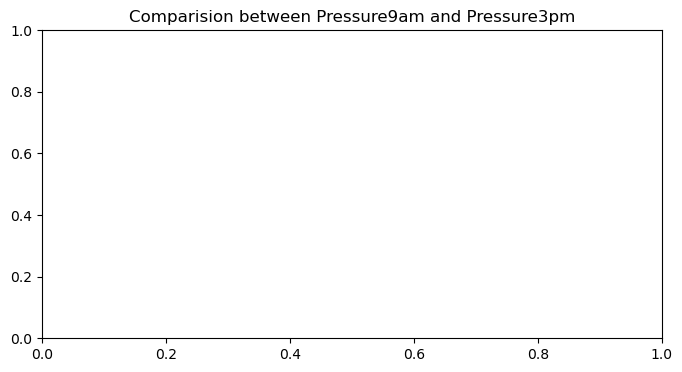

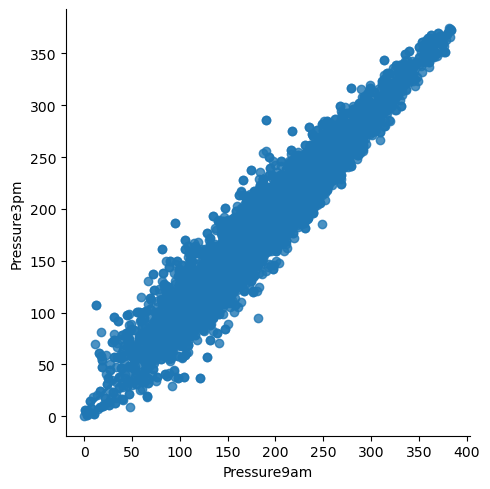

In [44]:
# Comparision between Pressure9am and Pressure3pm

plt.figure(figsize=(8,4))
plt.title('Comparision between Pressure9am and Pressure3pm')
sns.lmplot(x='Pressure9am',y='Pressure3pm' ,data=rfds ,palette='crest')
plt.show()

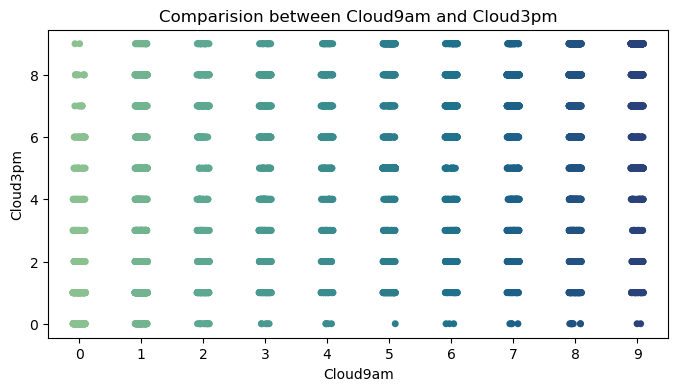

In [46]:
# Comparision between Cloud9am and Cloud3pm

plt.figure(figsize=(8,4))
plt.title('Comparision between Cloud9am and Cloud3pm')
sns.stripplot(x='Cloud9am',y='Cloud3pm' ,data=rfds ,palette='crest')
plt.show()

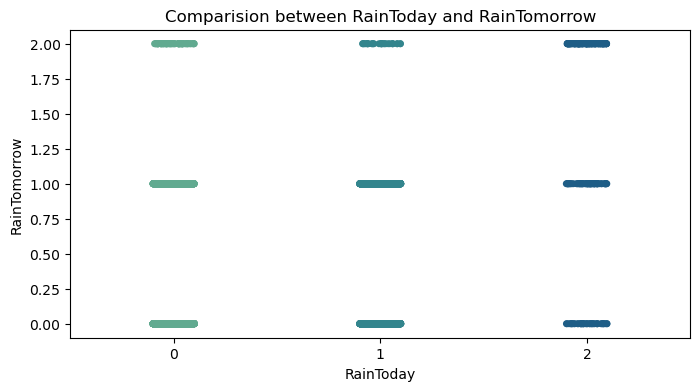

In [47]:
# Comparision between RainToday and RainTomorrow

plt.figure(figsize=(8,4))
plt.title('Comparision between RainToday and RainTomorrow')
sns.stripplot(x='RainToday',y='RainTomorrow' ,data=rfds ,palette='crest')
plt.show()

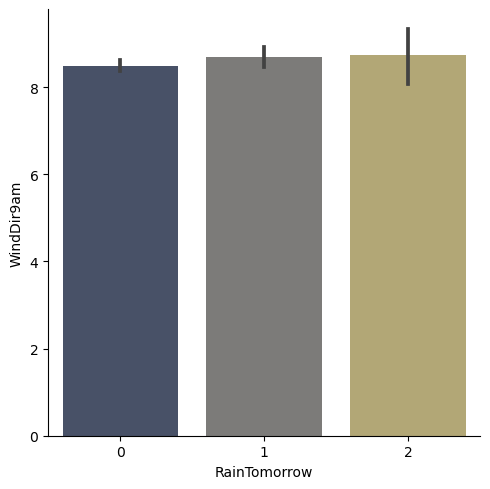

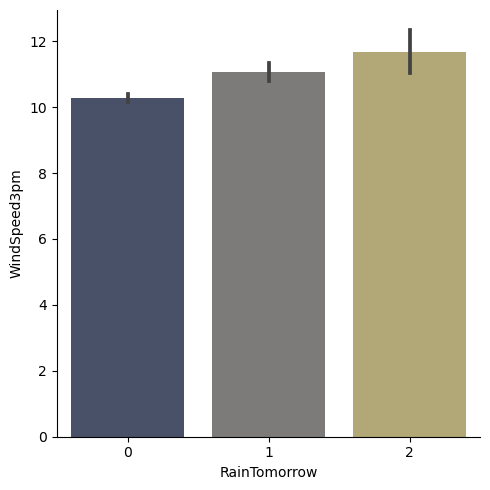

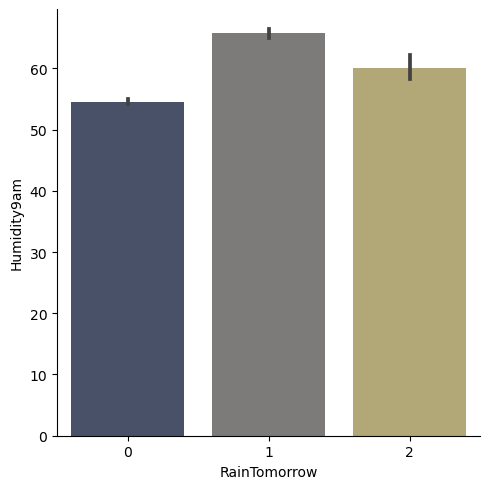

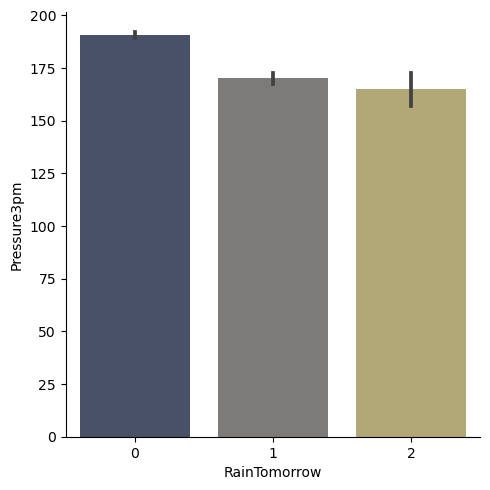

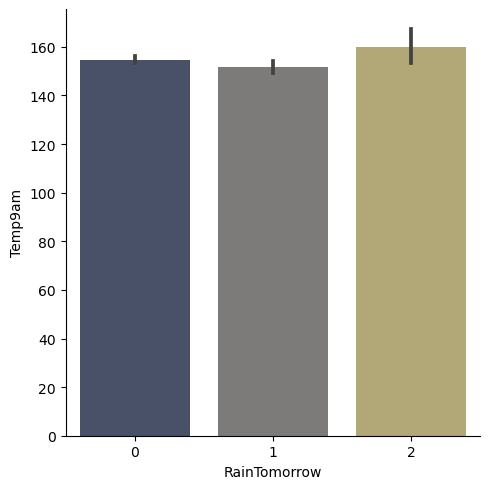

In [28]:
# Checking RainTomorrow with WindDir9am
sns.catplot(x='RainTomorrow' , y='WindDir9am' , data=rfds , palette='cividis' , kind='bar')

# Checking RainTomorrow with WindSpeed3pm
sns.catplot(x='RainTomorrow' , y='WindSpeed3pm' , data=rfds , palette='cividis' , kind='bar')

# Checking RainTomorrow with Humidity9am
sns.catplot(x='RainTomorrow' , y='Humidity9am' , data=rfds , palette='cividis' , kind='bar')

# Checking RainTomorrow with Pressure3pm
sns.catplot(x='RainTomorrow' , y='Pressure3pm' , data=rfds , palette='cividis' , kind='bar')

# Checking RainTomorrow with Temp9am
sns.catplot(x='RainTomorrow' , y='Temp9am' , data=rfds , palette='cividis' , kind='bar')



In the first plot rain tomorrow and windDir9am has the high value at point 2 .

In second plot rain tomorrow windspeed3pm has the maximum value at point 2.

In the 3rd plot of rain tomorrow and humidity point 1 has the highest value.

In the 4th plot of rain tomorrow and presure3pm has maximum value at point 0.

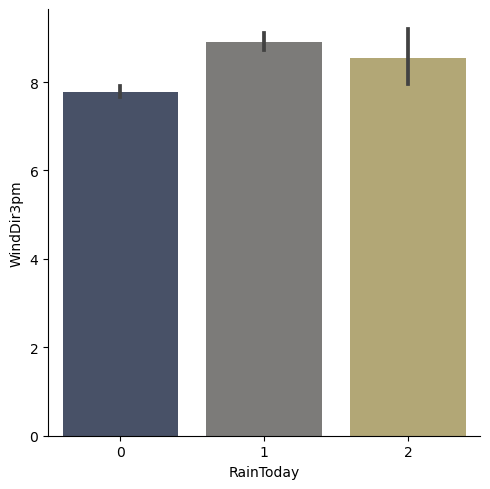

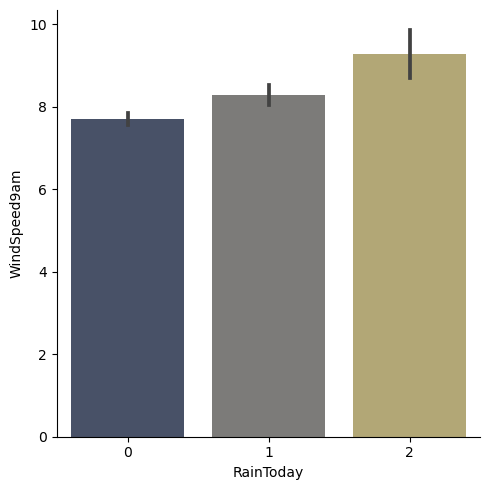

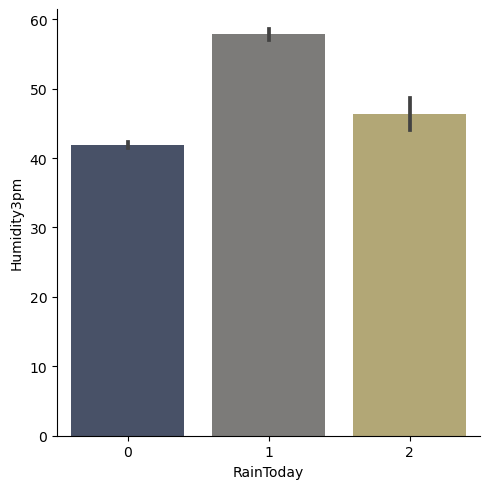

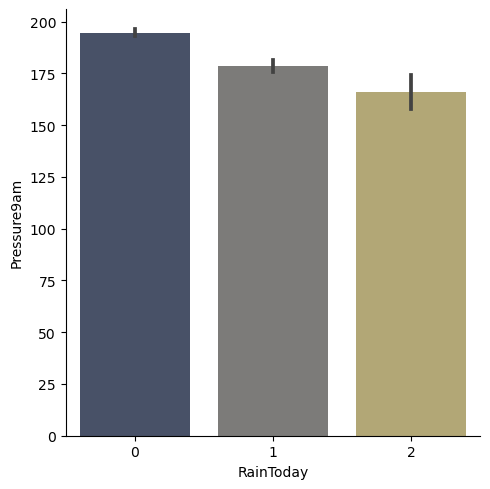

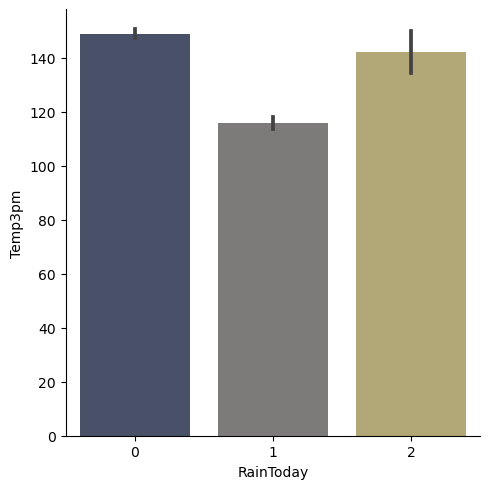

In [52]:
# Checking RainToday with WindDir3am
sns.catplot(x='RainToday' , y='WindDir3pm' , data=rfds , palette='cividis' , kind='bar')

# Checking RainToday with WindSpeed9pm
sns.catplot(x='RainToday' , y='WindSpeed9am' , data=rfds , palette='cividis' , kind='bar')

# Checking RainToday with Humidity3am
sns.catplot(x='RainToday' , y='Humidity3pm' , data=rfds , palette='cividis' , kind='bar')

# Checking RainToday with Pressure9pm
sns.catplot(x='RainToday' , y='Pressure9am' , data=rfds , palette='cividis' , kind='bar')

# Checking RainToday with Temp3am
sns.catplot(x='RainToday' , y='Temp3pm' , data=rfds , palette='cividis' , kind='bar')



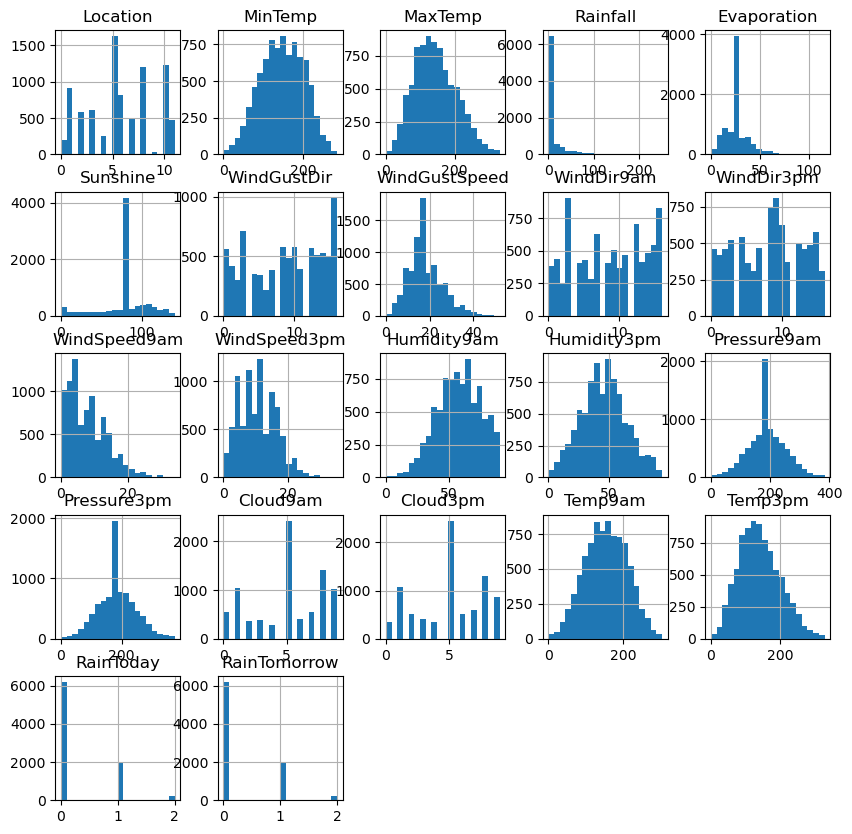

In [56]:
rfds.hist(bins=20, figsize=(10,10))
plt.show()

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

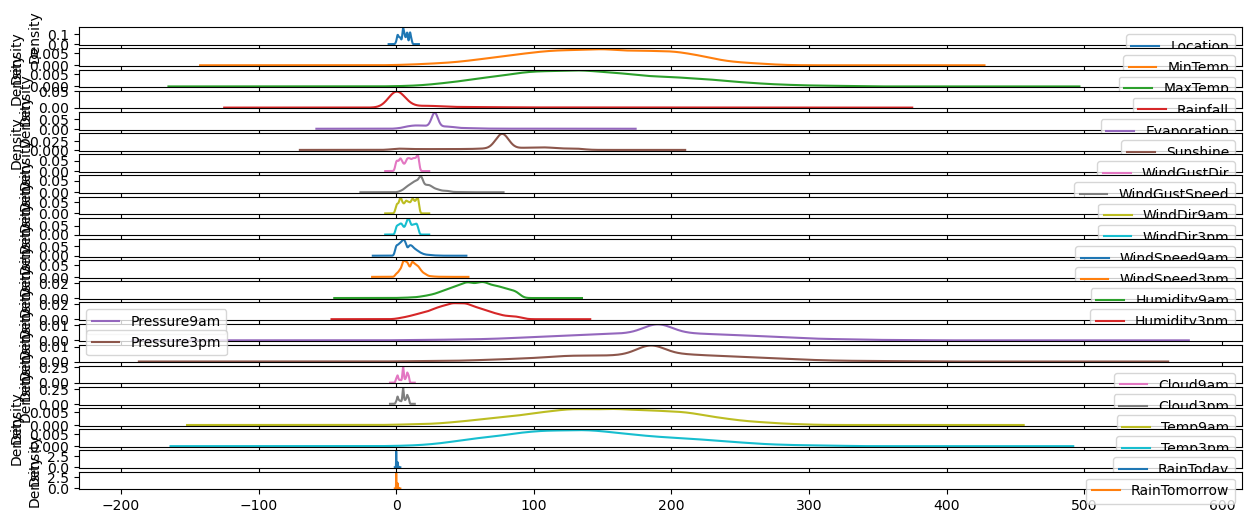

In [57]:
rfds.plot(kind='kde' , subplots=True , figsize=(15,6))

# Checking Skewness 

In [30]:
rfds.skew()

Location        -0.050456
MinTemp         -0.092722
MaxTemp          0.360277
Rainfall         3.490402
Evaporation      1.875648
Sunshine        -0.716504
WindGustDir     -0.183350
WindGustSpeed    0.703261
WindDir9am      -0.068691
WindDir3pm      -0.070695
WindSpeed9am     0.866936
WindSpeed3pm     0.403693
Humidity9am     -0.246076
Humidity3pm      0.115112
Pressure9am      0.015313
Pressure3pm      0.043677
Cloud9am        -0.315337
Cloud3pm        -0.250320
Temp9am         -0.025841
Temp3pm          0.376347
RainToday        1.521128
RainTomorrow     1.520255
dtype: float64

In [31]:
rfds['Rainfall']=np.cbrt(rfds['Rainfall'])

In [32]:
rfds['Evaporation']=np.sqrt(rfds['Evaporation'])

In [33]:
rfds['RainToday']=np.cbrt(rfds['RainToday'])

In [34]:
rfds['RainTomorrow']=np.cbrt(rfds['RainTomorrow'])

In [35]:
rfds.skew()

Location        -0.050456
MinTemp         -0.092722
MaxTemp          0.360277
Rainfall         1.246556
Evaporation      0.154216
Sunshine        -0.716504
WindGustDir     -0.183350
WindGustSpeed    0.703261
WindDir9am      -0.068691
WindDir3pm      -0.070695
WindSpeed9am     0.866936
WindSpeed3pm     0.403693
Humidity9am     -0.246076
Humidity3pm      0.115112
Pressure9am      0.015313
Pressure3pm      0.043677
Cloud9am        -0.315337
Cloud3pm        -0.250320
Temp9am         -0.025841
Temp3pm          0.376347
RainToday        1.098685
RainTomorrow     1.098582
dtype: float64

now we see the skewness is almost removed.

# Checking Outlier

<Figure size 800x200 with 0 Axes>

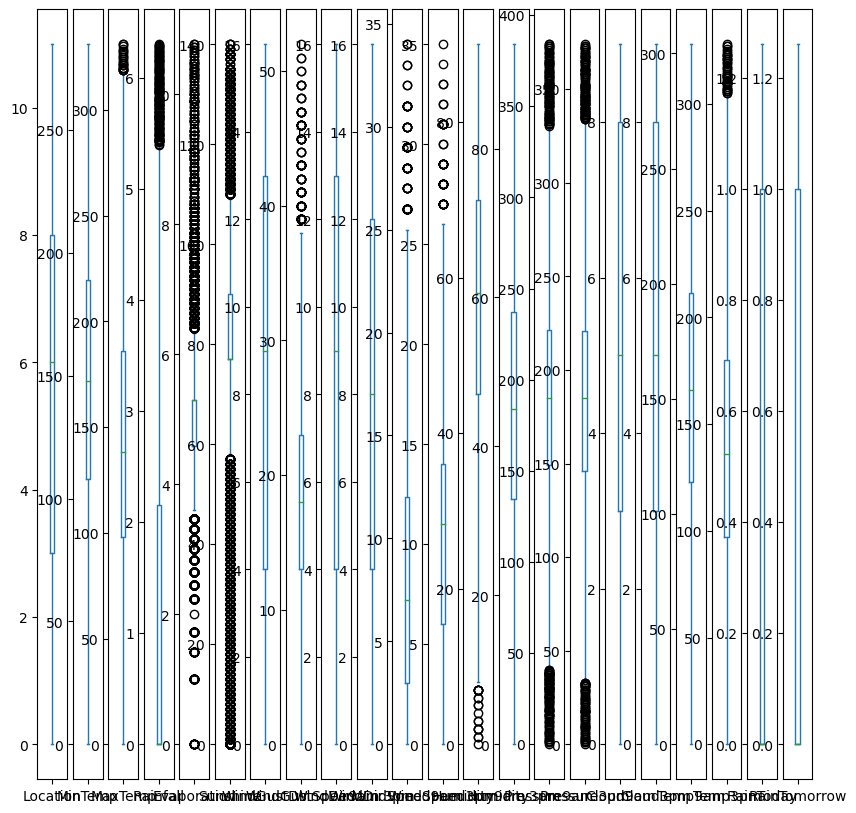

In [36]:
plt.figure(figsize=(8,2))
rfds.plot(kind='box' ,subplots=True  ,figsize=(10,10))
plt.show()

As per above plot we see that there is outlier present in this dataset and we will remove it.

In [37]:
# Removing Outliers

from scipy.stats import zscore

In [38]:
z = np.abs(zscore(rfds))
z

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,1.515776,0.047516,0.163138,0.384776,0.142506,0.001932,0.822266,0.367959,0.888498,1.266248,...,0.213076,1.589383,1.598676,1.325499,1.384669,0.013694,0.161357,0.114818,0.597484,0.597492
2008-12-02,1.515776,1.079105,0.211959,0.673253,0.142506,0.001932,1.015602,0.367959,0.508068,1.479649,...,1.416831,1.429054,1.135079,1.212343,0.033497,0.013694,0.108129,0.320862,0.597484,0.597492
2008-12-03,1.515776,0.063299,0.309810,0.673253,0.142506,0.001932,1.208937,0.496113,0.888498,1.479649,...,1.766097,1.161838,1.614662,1.066857,0.033497,1.130196,0.583839,0.136536,0.597484,0.597492
2008-12-04,1.515776,0.746660,0.684906,0.673253,0.142506,0.001932,0.917752,1.169893,0.090460,1.721369,...,1.358620,1.910042,0.016053,0.404086,0.033497,0.013694,0.069299,0.689514,0.597484,0.597492
2008-12-05,1.515776,0.804753,1.386173,0.564225,0.142506,0.001932,0.822266,0.111650,1.505616,0.227560,...,0.853397,1.001509,1.103107,1.503315,1.030127,1.474975,0.016071,1.225735,0.597484,0.597492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,1.013895,1.928688,0.081595,0.673253,0.142506,0.001932,1.691094,0.657276,0.090460,1.507968,...,1.009354,1.482497,1.118961,0.824464,0.033497,0.013694,1.367864,0.014277,0.597484,0.597492
2017-06-22,1.013895,1.780934,0.244576,0.673253,0.142506,0.001932,0.531081,1.298048,0.090460,1.081165,...,0.718299,1.642827,0.943113,0.630483,0.033497,0.013694,1.225922,0.354376,0.597484,0.597492
2017-06-23,1.013895,1.448489,0.505512,0.673253,0.142506,0.001932,1.111088,0.272813,0.090460,1.266248,...,0.892932,1.482497,0.543461,0.258684,0.033497,0.013694,0.942038,0.622486,0.597484,0.597492


In [39]:
threasold = 3
print(np.where(z>3))

(array([  44,   52,   61,   62,   62,   67,   68,   68,  123,  267,  381,
        381,  431,  462,  563,  568,  568,  683,  713,  796,  928,  949,
        980,  980,  980, 1008, 1008, 1009, 1011, 1138, 1148, 1149, 1151,
       1189, 1237, 1241, 1264, 1357, 1387, 1412, 1413, 1467, 1479, 1480,
       1480, 1481, 1513, 1535, 1587, 1644, 1665, 1673, 1680, 1898, 1903,
       1945, 2016, 2028, 2043, 2074, 2116, 2186, 2201, 2219, 2219, 2230,
       2500, 2505, 2527, 2527, 2676, 2827, 2835, 2849, 2855, 2863, 2869,
       2877, 2883, 2891, 2897, 2900, 2905, 2911, 2919, 2925, 2933, 2939,
       2947, 2953, 2961, 2967, 2975, 2989, 3003, 3045, 3051, 3059, 3059,
       3066, 3067, 3067, 3067, 3068, 3070, 3082, 3082, 3082, 3089, 3089,
       3098, 3099, 3099, 3101, 3139, 3141, 3150, 3157, 3164, 3172, 3172,
       3178, 3185, 3192, 3206, 3212, 3213, 3221, 3227, 3234, 3248, 3248,
       3256, 3260, 3291, 3302, 3302, 3350, 3449, 3450, 3458, 3491, 3557,
       3602, 3603, 3607, 3621, 3679, 3687, 3701, 3

In [40]:
rfds_new = rfds[(z<3).all(axis=1)]
rfds_new

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,1,150,134,1.709976,5.291503,77,13,21,13,14,...,61,16,90,103,9,5,145,134,0.0,0.000000
2008-12-02,1,89,157,0.000000,5.291503,77,14,21,6,15,...,33,19,119,110,5,5,148,160,0.0,0.000000
2008-12-03,1,144,163,0.000000,5.291503,77,15,22,13,15,...,27,24,89,119,5,2,187,149,0.0,0.000000
2008-12-04,1,107,186,0.000000,5.291503,77,4,9,9,0,...,34,10,189,160,5,5,158,182,0.0,0.000000
2008-12-05,1,191,229,2.000000,5.291503,77,13,19,1,7,...,72,27,121,92,8,9,155,214,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,9,43,139,0.000000,5.291503,77,0,13,9,1,...,40,18,260,236,5,5,77,140,0.0,0.000000
2017-06-22,9,51,159,0.000000,5.291503,77,6,8,9,3,...,45,15,249,224,5,5,85,162,0.0,0.000000
2017-06-23,9,69,175,0.000000,5.291503,77,3,16,9,14,...,42,18,224,201,5,5,101,178,0.0,0.000000


In [41]:
rfds_new.shape

(8048, 22)

In [42]:
rfds.shape

(8425, 22)

Here we see that outliers is removed .

In [43]:
rfds = rfds_new

# Checking Correlation

In [44]:
rfds.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Location,1.000000,0.118368,0.062054,0.026876,0.134013,0.049141,0.006110,0.245237,-0.088643,-0.024696,...,0.005309,0.064003,-0.023044,-0.009803,0.043387,0.023833,0.117941,0.058104,0.023709,0.027659
MinTemp,0.118368,1.000000,0.719921,0.088895,0.373520,0.057681,-0.141409,0.231481,-0.143329,-0.162987,...,-0.124064,0.094306,-0.434950,-0.429449,0.095275,0.038051,0.889087,0.687923,0.081239,0.104078
MaxTemp,0.062054,0.719921,1.000000,-0.227605,0.468721,0.377594,-0.204521,0.133407,-0.244864,-0.195571,...,-0.381289,-0.404622,-0.332398,-0.411571,-0.245837,-0.244953,0.865369,0.974540,-0.201882,-0.140218
Rainfall,0.026876,0.088895,-0.227605,1.000000,-0.168816,-0.265296,0.139928,0.100717,0.166029,0.119616,...,0.410823,0.387553,-0.130893,-0.049137,0.311402,0.266257,-0.092601,-0.239015,0.895866,0.364401
Evaporation,0.134013,0.373520,0.468721,-0.168816,1.000000,0.372397,-0.054331,0.176762,-0.073082,-0.026099,...,-0.303070,-0.218800,-0.262568,-0.276802,-0.103836,-0.140621,0.438534,0.455996,-0.160672,-0.094867
Sunshine,0.049141,0.057681,0.377594,-0.265296,0.372397,1.000000,-0.090188,0.002097,-0.081343,-0.066817,...,-0.365165,-0.433972,0.008760,-0.050073,-0.527084,-0.540822,0.252963,0.394683,-0.230135,-0.329578
WindGustDir,0.006110,-0.141409,-0.204521,0.139928,-0.054331,-0.090188,1.000000,0.024587,0.415093,0.513929,...,0.100182,0.103017,-0.103927,-0.030252,0.059832,0.065173,-0.163261,-0.214463,0.111984,0.049425
WindGustSpeed,0.245237,0.231481,0.133407,0.100717,0.176762,0.002097,0.024587,1.000000,-0.177011,0.062524,...,-0.260784,-0.080660,-0.379509,-0.338568,0.020006,0.067769,0.196409,0.097299,0.102662,0.190532
WindDir9am,-0.088643,-0.143329,-0.244864,0.166029,-0.073082,-0.081343,0.415093,-0.177011,1.000000,0.259606,...,0.197348,0.162697,0.044171,0.115501,0.112877,0.066223,-0.205395,-0.244389,0.140441,0.023840
WindDir3pm,-0.024696,-0.162987,-0.195571,0.119616,-0.026099,-0.066817,0.513929,0.062524,0.259606,1.000000,...,0.025696,0.015971,-0.120237,-0.036038,0.072863,0.063182,-0.184031,-0.204753,0.101169,0.021628


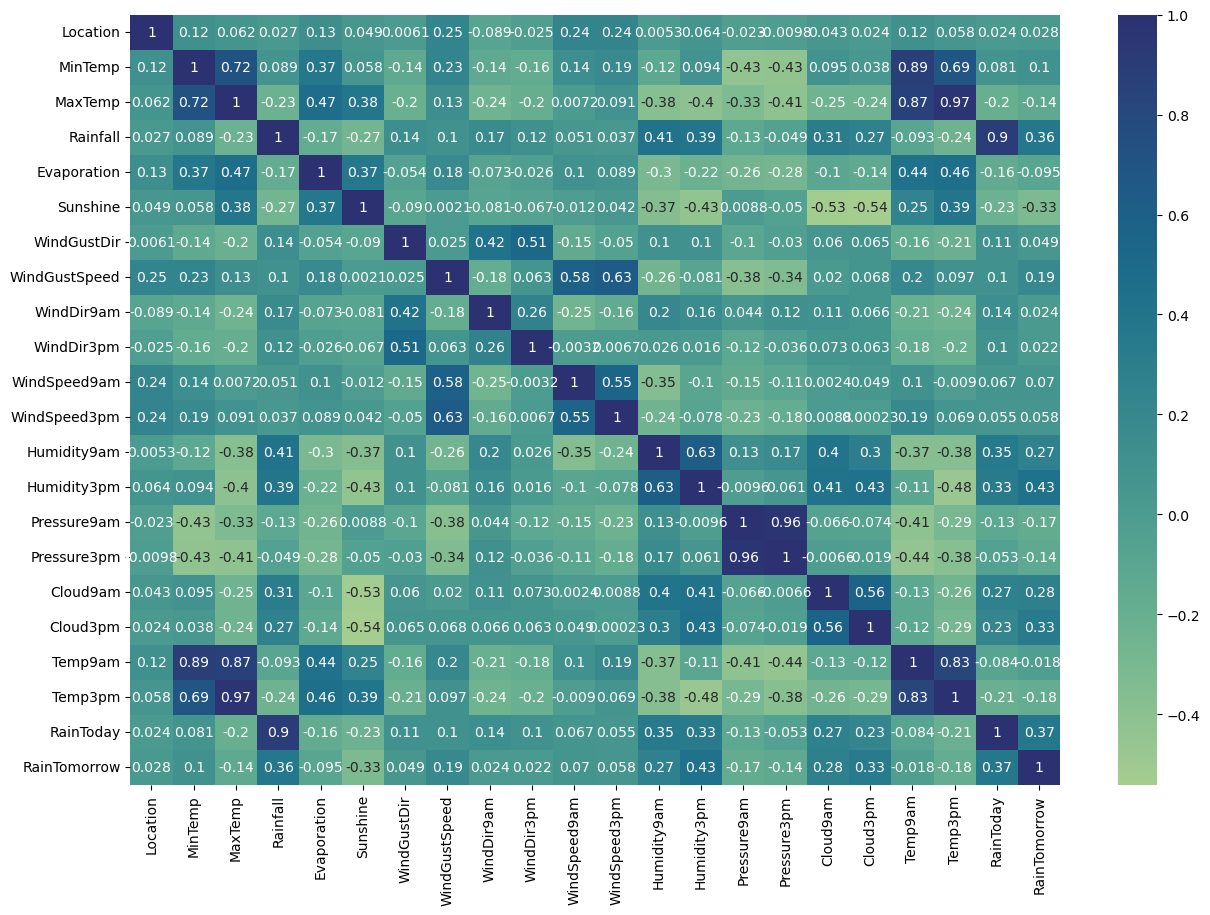

In [45]:
# checking heatmap for correlation
plt.figure(figsize=(15,10))
sns.heatmap(rfds.corr() , cmap='crest' , annot=True)
plt.show()

as per above plot we can see that there is multicollinearity present in the dataset .

# Here we Predict 'whether or not it will rain tomorrow'

In [46]:
# Assigning x and y value

x1 = rfds.drop('RainTomorrow',axis=1)
y = rfds['RainTomorrow']

In [47]:
x1.shape

(8048, 21)

In [48]:
# for removing multicollinearity we need only columns from x , where rows=0 and columns=1

x1.shape[1]

21

# Use of VIF for Multicollinearity

In [49]:
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
def vif_cal(x1):
    vif = pd.DataFrame()
    vif['Variables'] = x1.columns
    vif['VIF factor'] = [variance_inflation_factor(x1.values , i) for i in range(x1.shape[1])]
    return(vif)

vif_cal(x1)

,Variables,VIF factor
0,Location,4.985899
1,MinTemp,66.857265
2,MaxTemp,171.902215
3,Rainfall,8.159761
4,Evaporation,28.578306
5,Sunshine,15.501497
6,WindGustDir,6.229074
7,WindGustSpeed,14.863833
8,WindDir9am,5.364649
9,WindDir3pm,5.717036


# Use of PCA method

here we will use PCA method to remove multicollinearity.

In [51]:
from sklearn.decomposition import PCA

In [52]:
pca = PCA(n_components = 10)
x1 = pca.fit_transform(x1)
x1.shape

(8048, 10)

Here we see that multicollinearity is removed.

In [53]:
x = x1

# Performing train_test_split method

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x1_train ,x1_test , y1_train ,y1_test = train_test_split(x,y,test_size=.30 , random_state=45)

In [56]:
x1_train.shape

(5633, 10)

In [57]:
x1_test.shape

(2415, 10)

In [58]:
y1_train.shape

(5633,)

In [59]:
y1_test.shape

(2415,)

# Applying Models

In [60]:
from sklearn.metrics import r2_score, mean_squared_error , mean_absolute_error , accuracy_score
from sklearn.model_selection import cross_val_score

In [61]:
from sklearn.linear_model import LinearRegression ,Lasso ,Ridge , LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor , BaggingRegressor , AdaBoostRegressor 
from sklearn.svm import SVR

In [62]:
lr = LinearRegression()
lr.fit(x1_train , y1_train)
pred_lr = lr.predict(x1_test)
print('Linear Regression')

print('r2 score:',r2_score(y1_test,pred_lr))
print('mean squared error:',mean_squared_error(y1_test,pred_lr))
print('mean absolute error:',mean_absolute_error(y1_test,pred_lr))
print('squared root error:',np.sqrt(mean_squared_error(y1_test,pred_lr)))


Linear Regression
r2 score: 0.2650964447911537
mean squared error: 0.15486199165865755
mean absolute error: 0.3096329300744089
squared root error: 0.3935250839001976


In [63]:
ls = Lasso(alpha=0.001)
ls.fit(x1_train , y1_train)
pred_ls = ls.predict(x1_test)
print('Lasso Regression')

print('r2 score:',r2_score(y1_test,pred_ls))
print('mean squared error:',mean_squared_error(y1_test,pred_ls))
print('mean absolute error:',mean_absolute_error(y1_test,pred_ls))
print('squared root error:',np.sqrt(mean_squared_error(y1_test,pred_ls)))

Lasso Regression
r2 score: 0.2650837372281153
mean squared error: 0.1548646694501954
mean absolute error: 0.3096655317459484
squared root error: 0.39352848619915104


In [64]:
rd = Ridge(alpha=0.001)
rd.fit(x1_train , y1_train)
pred_rd = rd.predict(x1_test)
print('Ridge regression')

print('r2 score:',r2_score(y1_test,pred_rd))
print('mean squared error:',mean_squared_error(y1_test,pred_rd))
print('mean absolute error:',mean_absolute_error(y1_test,pred_rd))
print('squared root error:',np.sqrt(mean_squared_error(y1_test,pred_rd)))

Ridge regression
r2 score: 0.2650964447829557
mean squared error: 0.15486199166038506
mean absolute error: 0.30963293010305076
squared root error: 0.3935250839023925


In [65]:
dtr = DecisionTreeRegressor()
dtr.fit(x1_train , y1_train)
pred_dtr = dtr.predict(x1_test)
print('DecisionTreeRegressor')

print('r2 score:',r2_score(y1_test,pred_dtr))
print('mean squared error:',mean_squared_error(y1_test,pred_dtr))
print('mean absolute error:',mean_absolute_error(y1_test,pred_dtr))
print('squared root error:',np.sqrt(mean_squared_error(y1_test,pred_dtr)))

DecisionTreeRegressor
r2 score: 0.1355525312347612
mean squared error: 0.1821600341275075
mean absolute error: 0.1794513565811085
squared root error: 0.4268021018311736


In [66]:
knr = KNeighborsRegressor()
knr.fit(x1_train , y1_train)
pred_knr = knr.predict(x1_test)
print('KNeighborsRegressor')

print('r2 score:',r2_score(y1_test,pred_knr))
print('mean squared error:',mean_squared_error(y1_test,pred_knr))
print('mean absolute error:',mean_absolute_error(y1_test,pred_knr))
print('squared root error:',np.sqrt(mean_squared_error(y1_test,pred_knr)))

KNeighborsRegressor
r2 score: 0.20328532550254652
mean squared error: 0.16788709266931237
mean absolute error: 0.27312154506006414
squared root error: 0.40974027464884677


In [67]:
rfr = RandomForestRegressor()
rfr.fit(x1_train , y1_train)
pred_rfr = rfr.predict(x1_test)
print('Random Forest Regressor')

print('r2 score:',r2_score(y1_test,pred_rfr))
print('mean squared error:',mean_squared_error(y1_test,pred_rfr))
print('mean absolute error:',mean_absolute_error(y1_test,pred_rfr))
print('squared root error:',np.sqrt(mean_squared_error(y1_test,pred_rfr)))

Random Forest Regressor
r2 score: 0.4839576921295028
mean squared error: 0.10874262209038413
mean absolute error: 0.22918011970158864
squared root error: 0.32976146240939697


In [68]:
gbr = GradientBoostingRegressor()
gbr.fit(x1_train , y1_train)
pred_gbr = gbr.predict(x1_test)
print('GradientBoostingRegressor')

print('r2 score:',r2_score(y1_test,pred_gbr))
print('mean squared error:',mean_squared_error(y1_test,pred_gbr))
print('mean absolute error:',mean_absolute_error(y1_test,pred_gbr))
print('squared root error:',np.sqrt(mean_squared_error(y1_test,pred_gbr)))

GradientBoostingRegressor
r2 score: 0.32514652569010993
mean squared error: 0.14220798412071178
mean absolute error: 0.28084627413500995
squared root error: 0.3771047389263516


In [69]:
br = BaggingRegressor()
br.fit(x1_train ,y1_train)
pred_br = br.predict(x1_test)
print('BaggingRegressor')

print('r2 score:',r2_score(y1_test,pred_br))
print('mean squared error:',mean_squared_error(y1_test,pred_br))
print('mean absolute error:',mean_absolute_error(y1_test,pred_br))
print('squared root error:',np.sqrt(mean_squared_error(y1_test,pred_br)))

BaggingRegressor
r2 score: 0.4364182970898052
mean squared error: 0.11876032488405631
mean absolute error: 0.22578693222051935
squared root error: 0.34461619939297156


In [70]:
abr = AdaBoostRegressor()
abr.fit(x1_train ,y1_train)
pred_abr = abr.predict(x1_test)
print('AdaBoostRegressor')

print('r2 score:',r2_score(y1_test,pred_abr))
print('mean squared error:',mean_squared_error(y1_test,pred_abr))
print('mean absolute error:',mean_absolute_error(y1_test,pred_abr))
print('squared root error:',np.sqrt(mean_squared_error(y1_test,pred_abr)))

AdaBoostRegressor
r2 score: 0.17466999344298362
mean squared error: 0.17391703671204925
mean absolute error: 0.37693797629621323
squared root error: 0.41703361580578757


In [71]:
svr = SVR()
svr.fit(x1_train,y1_train)
pred_svr = svr.predict(x1_test)
print('Support vector regressor')

print('r2 score:',r2_score(y1_test,pred_svr))
print('mean squared error:',mean_squared_error(y1_test,pred_svr))
print('mean absolute error:',mean_absolute_error(y1_test,pred_svr))
print('squared root error:',np.sqrt(mean_squared_error(y1_test,pred_svr)))

Support vector regressor
r2 score: 0.2407834585202031
mean squared error: 0.15998532716357156
mean absolute error: 0.25363232090609156
squared root error: 0.39998165853395273


# Cross_validation_score

In [72]:
score1 = cross_val_score(lr,x,y)
print('score1:',score1)
print('score1 mean:',score1.mean())
print('score1 std:',score1.std())
print('Difference between r2 score and mean:',(r2_score(y1_test,pred_lr)-score1.mean())*100)

score1: [0.32041777 0.16727256 0.13474168 0.26269287 0.36006395]
score1 mean: 0.24903776848642023
score1 std: 0.08643786760546159
Difference between r2 score and mean: 1.6058676304733455


In [73]:
score2 = cross_val_score(ls,x,y)
print('score2:',score2)
print('score2 mean:',score2.mean())
print('score2 std:',score2.std())
print('Difference between r2 score and mean:',(r2_score(y1_test,pred_ls)-score2.mean())*100)

score2: [0.3203497  0.1672724  0.13485194 0.2627489  0.360031  ]
score2 mean: 0.24905078755447896
score2 std: 0.08639081211383524
Difference between r2 score and mean: 1.6032949673636332


In [74]:
score3 = cross_val_score(rd,x,y)
print('score3:',score3)
print('score3 mean:',score3.mean())
print('score3 std:',score3.std())
print('Difference between r2 score and mean:',(r2_score(y1_test,pred_rd)-score3.mean())*100)

score3: [0.32041777 0.16727256 0.13474168 0.26269287 0.36006395]
score3 mean: 0.24903776849763853
score3 std: 0.08643786756049308
Difference between r2 score and mean: 1.6058676285317153


In [75]:
score4 = cross_val_score(dtr,x,y)
print('score4:',score4)
print('score4 mean:',score4.mean())
print('score4 std:',score4.std())
print('Difference between r2 score and mean:',(r2_score(y1_test,pred_dtr)-score4.mean())*100)

score4: [-0.61992731  0.04118939  0.23331759  0.11801063 -0.78936767]
score4 mean: -0.203355471821216
score4 std: 0.41730183594790016
Difference between r2 score and mean: 33.890800305597715


In [76]:
score5 = cross_val_score(knr,x,y)
print('score5:',score5)
print('score5 mean:',score5.mean())
print('score5 std:',score5.std())
print('Difference between r2 score and mean:',(r2_score(y1_test,pred_knr)-score5.mean())*100)

score5: [ 0.0096634   0.1587137   0.17755962  0.18239407 -0.07569252]
score5 mean: 0.09052765321543284
score5 std: 0.10472011474983528
Difference between r2 score and mean: 11.275767228711368


In [77]:
score6 = cross_val_score(rfr,x,y)
print('score6:',score6)
print('score6 mean:',score6.mean())
print('score6 std:',score6.std())
print('Difference between r2 score and mean:',(r2_score(y1_test,pred_rfr)-score6.mean())*100)

score6: [0.22836972 0.38620103 0.52747993 0.40530883 0.26683736]
score6 mean: 0.3628393730329975
score6 std: 0.1065405166110836
Difference between r2 score and mean: 12.111831909650528


In [78]:
score7 = cross_val_score(gbr,x,y)
print('score7:',score7)
print('score7 mean:',score7.mean())
print('score7 std:',score7.std())
print('Difference between r2 score and mean:',(r2_score(y1_test,pred_gbr)-score7.mean())*100)

score7: [0.31295677 0.18082784 0.20116237 0.29290799 0.35390268]
score7 mean: 0.26835152819001873
score7 std: 0.06646265873595773
Difference between r2 score and mean: 5.67949975000912


In [79]:
score8 = cross_val_score(br,x,y)
print('score8:',score8)
print('score8 mean:',score8.mean())
print('score8 std:',score8.std())
print('Difference between r2 score and mean:',(r2_score(y1_test,pred_br)-score8.mean())*100)

score8: [0.1541819  0.34684238 0.46116712 0.32892702 0.20629948]
score8 mean: 0.29948358383489476
score8 std: 0.10867124190152805
Difference between r2 score and mean: 13.693471325491041


In [80]:
score9 = cross_val_score(abr,x,y)
print('score9:',score9)
print('score9 mean:',score9.mean())
print('score9 std:',score9.std())
print('Difference between r2 score and mean:',(r2_score(y1_test,pred_abr)-score9.mean())*100)

score9: [0.13185325 0.10306741 0.08074276 0.18635591 0.0694554 ]
score9 mean: 0.11429494559307944
score9 std: 0.04186518251141654
Difference between r2 score and mean: 6.037504784990418


In [81]:
score10 = cross_val_score(svr,x,y)
print('score10:',score10)
print('score10 mean:',score10.mean())
print('score10 std:',score10.std())
print('Difference between r2 score and mean:',(r2_score(y1_test,pred_svr)-score10.mean())*100)

score10: [0.29208437 0.05253798 0.17955489 0.1884505  0.2809661 ]
score10 mean: 0.19871876941549843
score10 std: 0.08639823515101495
Difference between r2 score and mean: 4.206468910470468


# Hyper Parameter Tunning

In [82]:
from sklearn.model_selection import GridSearchCV

parameters ={'n_neighbors':[1,3,5],'algorithm':['auto','ball_tree','brute'],'leaf_size':[10,20,30]}

In [83]:
grid = GridSearchCV(KNeighborsRegressor(),parameters,cv=2)

In [84]:
grid.fit(x1_train,y1_train)

GridSearchCV(cv=2, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'brute'],
                         'leaf_size': [10, 20, 30], 'n_neighbors': [1, 3, 5]})

In [85]:
grid.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5}

In [86]:
Final_knr =KNeighborsRegressor(algorithm='auto', leaf_size=10, n_neighbors= 5)
Final_knr.fit(x1_train,y1_train)
predknr= Final_knr.predict(x1_test)
print(predknr)

[0.2 0.  1.  ... 0.4 0.  0.2]


In [87]:
# Saving the model

import pickle
raintomm ='rainknr.pkl'
pickle.dump(Final_knr,open(raintomm,'wb')) # model saved

In [88]:
# loading saved model

loaded_mod = pickle.load(open('rainknr.pkl','rb'))
result = loaded_mod.score(x1_test,y1_test)
print(result*100)

20.45972686746307


In [89]:
conclusion = pd.DataFrame([loaded_mod.predict(x1_test)[:],y1_test[:]], index =['Predict','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2405,2406,2407,2408,2409,2410,2411,2412,2413,2414
Predict,0.2,0.0,1.0,0.2,0.0,0.2,0.0,0.2,0.6,0.0,...,0.0,0.0,0.4,0.4,0.6,0.8,0.4,0.4,0.0,0.2
Original,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


# Finalizing the Model

In [90]:
final_knr = KNeighborsRegressor()
final_knr.fit(x1_train , y1_train)
pred_knr = final_knr.predict(x1_test)
print(pred_knr)

[0.2 0.  1.  ... 0.4 0.  0.2]


In [91]:
# saving best model using .pkl

import joblib
joblib.dump(final_knr,'rain_tomorrow.pkl')

['rain_tomorrow.pkl']

In [92]:
# Predicting the saved model

model_knr = joblib.load('rain_tomorrow.pkl')

# Prediction
prediction = model_knr.predict(x1_test)
prediction 

array([0.2, 0. , 1. , ..., 0.4, 0. , 0.2])

In [93]:
a = np.array(y1_test)
rtds = pd.DataFrame()
rtds['predicted'] = prediction
rtds['original'] = a
rtds

,predicted,original
0,0.2,1.0
1,0.0,0.0
2,1.0,1.0
3,0.2,0.0
4,0.0,0.0
...,...,...
2410,0.8,0.0
2411,0.4,1.0
2412,0.4,0.0
2413,0.0,0.0


Here the prediction done for whether or not it will rain tomorrow.

# Now we will 'predict how much rainfall could be there'

In [94]:
# Assigning x and y value 

X = rfds.drop('RainToday',axis=1)
Y = rfds['RainToday']

In [95]:
X.shape

(8048, 21)

In [96]:
# for removing multicollinearity we need only columns from x , where rows=0 and columns=1

X.shape[1]

21

# Use of VIF for multicollinearity

In [97]:
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
def vif_cal(X):
    vif = pd.DataFrame()
    vif['Variables'] = X.columns
    vif['VIF factor'] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
    return(vif)

vif_cal(X)

,Variables,VIF factor
0,Location,4.991160
1,MinTemp,66.834649
2,MaxTemp,172.062866
3,Rainfall,2.231467
4,Evaporation,28.566328
5,Sunshine,15.712500
6,WindGustDir,6.228497
7,WindGustSpeed,15.267885
8,WindDir9am,5.365382
9,WindDir3pm,5.718195


# Use of PCA method

In [99]:
pca = PCA(n_components = 10)
X = pca.fit_transform(X)
X.shape

(8048, 10)

now we see that number of columns is reduces and multicollinearity is removed .

# Performing train_test_split method

In [100]:
x2_train , x2_test , y2_train ,y2_test = train_test_split(x,y,test_size=.30 ,random_state=45)

In [101]:
x2_train.shape

(5633, 10)

In [102]:
x2_test.shape

(2415, 10)

In [103]:
y2_train.shape

(5633,)

In [104]:
y2_test.shape

(2415,)

# Applying Models

In [105]:
model =[LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),
         KNeighborsRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),BaggingRegressor(),AdaBoostRegressor(),
         SVR()]

for m in model:
    m.fit(x2_train , y2_train)
    pred_m = m.predict(x2_test)
    print(m)
    print('r2 score:',r2_score(y2_test,pred_m))
    print('mean squared error:',mean_squared_error(y2_test,pred_m))
    print('mean absolute error:',mean_absolute_error(y2_test,pred_m))
    print('squared root error:',np.sqrt(mean_squared_error(y2_test,pred_m)))
    print('\n')

LinearRegression()
r2 score: 0.2650964447911537
mean squared error: 0.15486199165865755
mean absolute error: 0.3096329300744089
squared root error: 0.3935250839001976


Lasso()
r2 score: 0.18988551336502113
mean squared error: 0.17071075787103987
mean absolute error: 0.33935917939897675
squared root error: 0.41317158405563165


Ridge()
r2 score: 0.2650964365929296
mean squared error: 0.15486199338622206
mean absolute error: 0.30963295871616947
squared root error: 0.3935250860951841


DecisionTreeRegressor()
r2 score: 0.0983497861787388
mean squared error: 0.18999955423012513
mean absolute error: 0.1872112236411934
squared root error: 0.43588938302065255


KNeighborsRegressor()
r2 score: 0.20328532550254652
mean squared error: 0.16788709266931237
mean absolute error: 0.27312154506006414
squared root error: 0.40974027464884677


RandomForestRegressor()
r2 score: 0.4827469991360839
mean squared error: 0.10899774444884756
mean absolute error: 0.22884350991070843
squared root error: 0.33014

# Cross_validation_score

In [106]:
models =[LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),
         KNeighborsRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),BaggingRegressor(),AdaBoostRegressor(),
         SVR()]

for i in models:
    score = cross_val_score(i,x,y)
    print(i)
    print('score:',score)
    print('score mean:',score.mean())
    print('score std:',score.std())
    print('Differnce between r2 score and mean:',(r2_score(y2_test,pred_m)-score.mean())*100)
    print('\n')


LinearRegression()
score: [0.32041777 0.16727256 0.13474168 0.26269287 0.36006395]
score mean: 0.24903776848642023
score std: 0.08643786760546159
Differnce between r2 score and mean: -0.8254309966217122


Lasso()
score: [0.22748458 0.10664999 0.09005207 0.19879581 0.26978855]
score mean: 0.178554201456468
score std: 0.06947007098145354
Differnce between r2 score and mean: 6.222925706373511


Ridge()
score: [0.32041773 0.16727259 0.13474176 0.26269292 0.3600639 ]
score mean: 0.24903777970430427
score std: 0.08643782263717731
Differnce between r2 score and mean: -0.825432118410116


DecisionTreeRegressor()
score: [-0.60465388  0.01529548  0.2584981   0.04090495 -0.78620915]
score mean: -0.21523290183396862
score std: 0.4051749173651933
Differnce between r2 score and mean: 45.60163603541717


KNeighborsRegressor()
score: [ 0.0096634   0.1587137   0.17755962  0.18239407 -0.07569252]
score mean: 0.09052765321543284
score std: 0.10472011474983528
Differnce between r2 score and mean: 15.02558

# Finalizing the Model

In [113]:
final_rf=RandomForestRegressor()
final_rf.fit(x2_train , y2_train)
predrf= final_rf.predict(x2_test)
print(predrf)

[0.27819447 0.         0.49638895 ... 0.14       0.02259921 0.09      ]


# Saving the Model

In [114]:
import joblib
joblib.dump(final_rf,'rain.pkl')

['rain.pkl']

In [115]:
# predicting saved model

model1 = joblib.load('rain.pkl')

# prediction
prediction1 = model1.predict(x2_test)
prediction1

array([0.27819447, 0.        , 0.49638895, ..., 0.14      , 0.02259921,
       0.09      ])

# Checking Predicted Model

In [116]:
b = np.array(y2_test)
rhds = pd.DataFrame()
rhds['predicted'] = prediction1
rhds['original'] = b
rhds

,predicted,original
0,0.278194,1.0
1,0.000000,0.0
2,0.496389,1.0
3,0.553790,0.0
4,0.060000,0.0
...,...,...
2410,0.450000,0.0
2411,0.770000,1.0
2412,0.140000,0.0
2413,0.022599,0.0


here we are done with the prediction for how much it will rain today.